In [1]:
import sys
sys.path.append("../") # go to parent dir

from pathlib2 import Path

import random
from load_data import load_data
from test_instances.normal_ts_test import NormalTSTest
from test_instances.normal_fair_sd_ts_test import NormalFairSDTest
from test_instances.normal_sd_ts_test import NormalSDTest
import numpy as np
import pickle

from normalBandits import NormalBandits
import divergence as div

import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [32]:
def plot_new_lambda_regret_tradeoff(n_lam, e2_arr, delta_arr, sd_tests, fair_tests):
    fair_fr = np.zeros((len(e2_arr), len(delta), n_lam))
    fair_r = np.zeros((len(e2_arr), len(delta), n_lam))
    
    sd_fr = np.zeros(n_lam)
    sd_r = np.zeros(n_lam)
    lam_arr = np.linspace(0, 1, n_lam)
    
    for ind, sd_test in enumerate(sd_tests):
         lam_ind = np.where(lam_arr == sd_test.lam)[0][0]
         sd_fr[lam_ind] = np.add.accumulate(sd_test.average_fairness_regret)[-1]
         sd_r[lam_ind] = sd_test.average_regret[-1]
    for ind, fair_test in enumerate(fair_tests):        
        d_ind = np.where(delta_arr == fair_test.delta_arr[0])[0][0]
        lam_ind = np.where(lam_arr == fair_test.lam)[0][0]
        e2_ind = np.where(e2_arr == fair_test.e2_arr[0])[0][0]
        fair_fr[e2_ind, d_ind, lam_ind] = np.add.accumulate(fair_test.average_fairness_regret[0, 0, :])[-1]
        fair_r[e2_ind, d_ind, lam_ind] = fair_test.average_regret[0, 0,-1]
#     fair_fr.sort()
#     fair_r.sort()
#     sd_fr.sort()
#     sd_r.sort()
    plt.plot(sd_fr, sd_r, label='Hybrid ' + sd_tests[0].get_name(), marker='x')

#     for i in range(len(e2_arr)):
#         for j in range(len(delta)):
#             fair_fr[i,j].sort(key=lambda x: x.lam)
#             fair_r[i,j].sort(key=lambda x: x.lam)

            
    
    for e2_ind, e2 in enumerate(e2_arr):
        for d_ind, d in enumerate(delta_arr):
            plt.plot(fair_fr[e2_ind, d_ind], fair_r[e2_ind, d_ind], label = 'Hybrid ' + fair_tests[0].get_name(e2=e2, delta=d)
                    ,marker = 'x')
    
    plt.xlabel('Cumulative Fairness Regret')
    plt.ylabel('Total Regret')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    save_plot('tradeoff')
    plt.show()

In [19]:
def get_tests(folder):
    ts_test = np.empty(4, dtype=object)
    sd_ts_test = np.empty(4, dtype=object)
    fair_sd_ts_test = np.empty(4, dtype=object)
    for i in range(4):
        ts_test[i] = []
        sd_ts_test[i] = []
        fair_sd_ts_test[i] = []
    comb = []
    for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder):
        if file.endswith(".file"):
            with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder, file), "rb") as f:
                test = pickle.load(f) 
                if test.T >= end_index and test.n_iter == n_iter:
                    if test.bandits.data_set_name == 'D0':
                        d = 0
                    elif test.bandits.data_set_name == 'D1':
                        d = 1
                    elif test.bandits.data_set_name == 'D2':
                        d = 2
                    elif test.bandits.data_set_name == 'D3':
                        d = 3
                    if test.name == 'TS':
                        ts_test[d].append(test)
                    elif test.name == 'SD  TS' or test.name == 'SD TS':
                        sd_ts_test[d].append(test)

                    elif test.name == 'Fair SD TS':
                        
#                         if (test.e2_arr[0], test.delta_arr[0]) in comb:
#                             print (test.e2_arr[0], test.delta_arr[0])
#                             print comb 
#                             os.remove(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"
#                                                     +folder, file))
#                         else:
                        fair_sd_ts_test[d].append(test)
                        comb.append((test.e2_arr[0],test.delta_arr[0]))
                    else:
                        print 'unknwown test name'
                        
                # To sort the list in place...
    for i in range(4):
         fair_sd_ts_test[i].sort(key=lambda x: (x.e2_arr[0], x.delta_arr[0]), reverse=False)
    return ts_test, sd_ts_test, fair_sd_ts_test


# def get_tests(folder):
#     ts_test = np.empty(4, dtype=object)
#     sd_ts_test = np.empty(4, dtype=object)
#     fair_sd_ts_test = np.empty(4, dtype=object)
#     for i in range(4):
#         ts_test[i] = []
#         sd_ts_test[i] = []
#         fair_sd_ts_test[i] = []
#     comb = []
#     for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder):
#         if file.endswith(".file"):
#             with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder, file), "rb") as f:
#                 test = pickle.load(f) 
#                 if test.T >= end_index and test.n_iter == n_iter:
#                     d=2
#                     if test.name == 'TS':
#                         ts_test[d].append(test)
#                     elif test.name == 'SD  TS' or test.name == 'SD TS':
#                         sd_ts_test[d].append(test)
#                         print 'sd'
#                     elif test.name == 'Fair SD TS':
#                         print 'fair'
# #                         if (test.e2_arr[0], test.delta_arr[0]) in comb:
# #                             print (test.e2_arr[0], test.delta_arr[0])
# #                             print comb 
# #                             os.remove(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"
# #                                                     +folder, file))
# #                         else:
#                         fair_sd_ts_test[d].append(test)
#                         comb.append((test.e2_arr[0],test.delta_arr[0]))
#                     else:
#                         print 'unknwown test name'
                        
#                 # To sort the list in place...
#     for i in range(4):
#          fair_sd_ts_test[i].sort(key=lambda x: (x.e2_arr[0], x.delta_arr[0]), reverse=False)
#     return ts_test, sd_ts_test, fair_sd_ts_test


In [20]:
T = 5000
n_iter = 50.
end_index=T
folder_normal = 'normal_objects/tradeoff2/'
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal)
n = 11

fair
sd
fair
sd
fair
fair
sd
fair
sd
fair
sd
fair
fair
fair
sd
fair
fair
fair
fair
fair
fair
fair
fair
sd
fair
fair
fair
fair
sd
fair
fair
fair
sd
fair
fair
fair
sd
fair


In [13]:
e2 = np.asarray([0.1, 0.2])
delta =  np.asarray([0.01, 0.2])

In [ ]:
fair_sd_ts_test[2][0].e2_arr[0]

In [21]:
print fair_sd_ts_test[2][-1].average_fairness_regret

[[[0.03320062 0.03320062 0.03320062 ... 0.03573708 0.08195472 0.08204012]]]


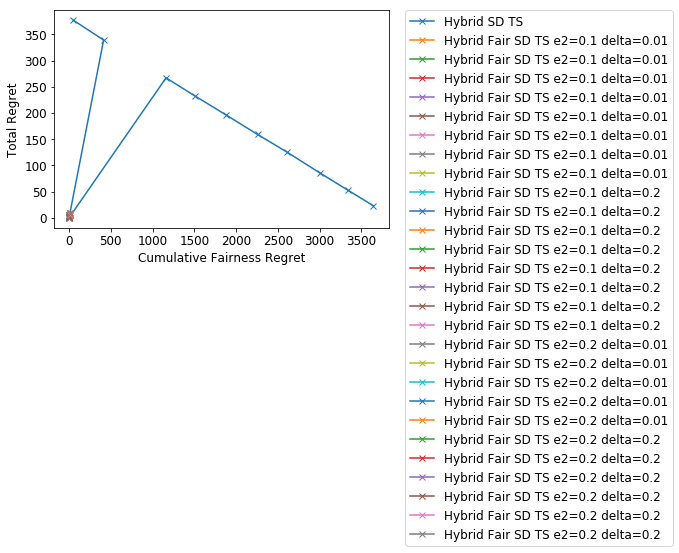

In [33]:
plot_new_lambda_regret_tradeoff(n, e2, delta, sd_ts_test[2], fair_sd_ts_test[2]) #LONGER LAMBDA -> LONGER EXPLORE (PLOT EXPLORE)

In [ ]:
for test in fair_sd_tests:
    print test.average_rounds_exploring

In [ ]:
# plt_sep.plot_fairness_regret(fair_sd_tests)
# plt_sep.plot_average_total_regret(fair_sd_tests)


In [ ]:
# print fair_sd_tests[0].lam
# print fair_sd_tests[0].pi
# print fair_sd_tests[0].average_regret[0,0,-1]

# print fair_sd_tests[1].lam
# print fair_sd_tests[1].pi
# print fair_sd_tests[1].average_regret[0,0,-1]


# print fair_sd_tests[-2].lam
# print fair_sd_tests[-2].pi
# print fair_sd_tests[-2].average_regret[0,0,-1]

# print fair_sd_tests[-1].lam
# print fair_sd_tests[-1].pi
# print fair_sd_tests[-1].average_regret[0,0,-1]
